In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [13]:
# 1 data collection
def fetch_data(tickers, period='20d'): # change to 20 days, how many relevant to premarket gap up screener
    data = {}
    for name, ticker in tickers.items():
        df = yf.download(ticker, period=period)
        df['Index'] = name
        df['Daily Change %'] = df['Close'].pct_change() * 100
        data[name] = df
    return data

# Define tickers
tickers = {
    'S&P 500': '^GSPC',
    'VIX': '^VIX'
}

# Fetch data
data = fetch_data(tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [14]:
# 2 feature engineering
def prepare_combined_dataframe(data):
    combined_data = pd.DataFrame()

    for name, df in data.items():
        if name != 'VIX':
            df = df[['Daily Change %']].rename(columns={'Daily Change %': name})
        else:
            df = df[['Close', 'Daily Change %']].rename(columns={'Close': name, 'Daily Change %': f'{name} Change %'})
        combined_data = pd.concat([combined_data, df], axis=1)
    
    combined_data.reset_index(inplace=True)
    return combined_data

# Prepare combined dataframe
combined_data = prepare_combined_dataframe(data)
print("Combined Data for the Last 14 Trading Days:")
display(combined_data)


Combined Data for the Last 14 Trading Days:


,Date,S&P 500,VIX,VIX Change %
0,2024-06-10,NaN,NaN,NaN
1,2024-06-11,0.271038,NaN,NaN
2,2024-06-12,0.850367,NaN,NaN
3,2024-06-13,0.234466,11.94,NaN
4,2024-06-14,-0.039386,12.66,6.030153
5,2024-06-17,0.766439,12.75,0.710902
6,2024-06-18,0.252133,12.30,-3.529410
7,2024-06-20,-0.252593,13.28,7.967476
8,2024-06-21,-0.156213,13.20,-0.602409
9,2024-06-24,-0.306517,13.33,0.984849


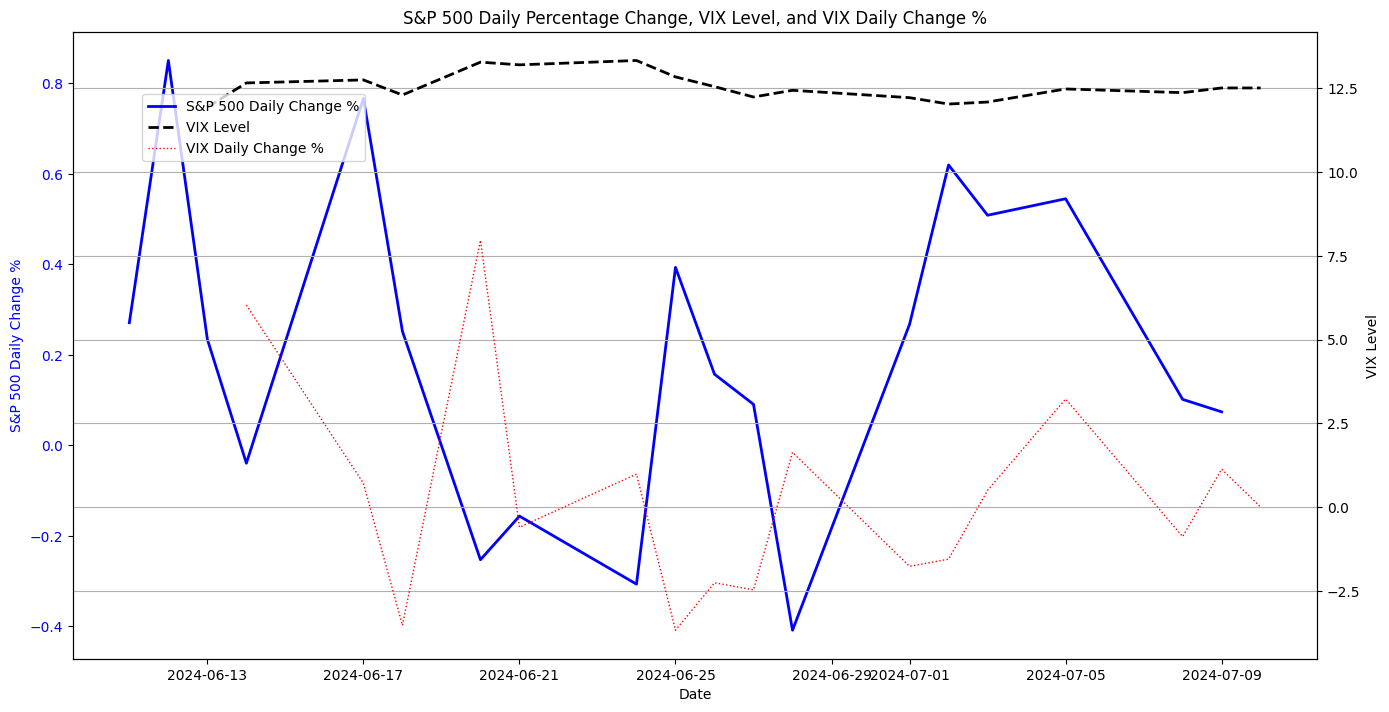

In [23]:
# 3 analyis and visualization
def plot_data(combined_data):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot S&P 500 daily percentage changes on the first y-axis
    ax1.plot(combined_data['Date'], combined_data['S&P 500'], label='S&P 500 Daily Change %', color='blue', linewidth=2)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('S&P 500 Daily Change %', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

    # Create a second y-axis for the VIX level
    ax2 = ax1.twinx()
    ax2.plot(combined_data['Date'], combined_data['VIX'], label='VIX Level', color='black', linewidth=2, linestyle='--')
    ax2.set_ylabel('VIX Level', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Plot the VIX daily percentage change on the second y-axis
    ax2.plot(combined_data['Date'], combined_data['VIX Change %'], label='VIX Daily Change %', color='red', linewidth=1, linestyle=':')
    
    # Add legends
    fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

    # Add grid and title
    fig.tight_layout()
    plt.title('S&P 500 Daily Percentage Change, VIX Level, and VIX Daily Change %')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Plot data
plot_data(combined_data)


In [16]:
# 1 ---- Sentiment and News ----
# 1a ---- Stocktwits ----

In [17]:
# 1b ---- Twitter (X) ----

In [18]:
# 1c ---- IEX Cloud (deprecating in August 2024) ----

In [19]:
# 1x ---- Transform over the news, maybe create own sentiment score
# might want to run this actually first on overall market and stuff but then specifically on stocks, not sure yet 

In [20]:
# 2 ---- Foreign Exchanges and Foreign News ----

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Combined Data for the Last 14 Trading Days:


,Date,S&P 500,NASDAQ,Dow Jones
0,2024-06-18,NaN,NaN,NaN
1,2024-06-20,-0.252593,-0.787363,0.772250
2,2024-06-21,-0.156213,-0.181871,0.039776
3,2024-06-24,-0.306517,-1.088446,0.666362
4,2024-06-25,0.393359,1.262115,-0.758796
5,2024-06-26,0.157243,0.493913,0.039989
6,2024-06-27,0.090732,0.300584,0.092665
7,2024-06-28,-0.408365,-0.705988,-0.115410
8,2024-07-01,0.267556,0.827296,0.129503
9,2024-07-02,0.619532,0.835933,0.414435


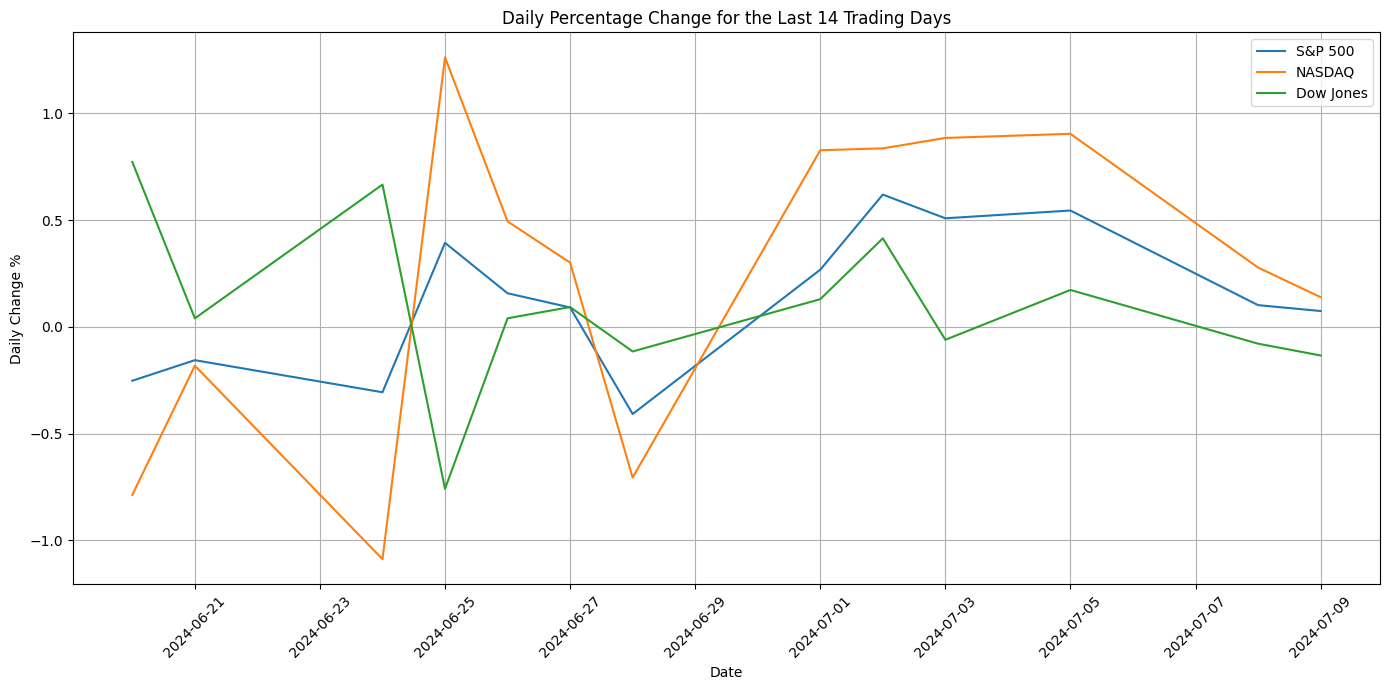

In [21]:
# 3 ---- Major Indicies Performance ----

# Define the indices and their corresponding Yahoo Finance tickers
indices = {
    'S&P 500': '^GSPC',
    'NASDAQ': '^IXIC',
    'Dow Jones': '^DJI'
}

# Function to fetch data for a given ticker and add index name
def fetch_index_data(index_name, ticker, period):
    data = yf.download(ticker, period=period)
    data['Index'] = index_name
    data['Daily Change %'] = data['Close'].pct_change() * 100
    return data

# Fetch data for the last 14 trading days
period = '14d'
indices_data = {index: fetch_index_data(index, ticker, period) for index, ticker in indices.items()}

# Create a combined dataframe for the last 14 trading days
major_index_df = pd.DataFrame()

for index, data in indices_data.items():
    data = data[['Daily Change %']].rename(columns={'Daily Change %': index})
    major_index_df = pd.concat([major_index_df, data], axis=1)

# Reset the index to ensure the Date column is in the dataframe
major_index_df.reset_index(inplace=True)

# Display the combined dataframe
print("Combined Data for the Last 14 Trading Days:")
display(major_index_df)

# Plot the data
plt.figure(figsize=(14, 7))
for index in indices.keys():
    plt.plot(major_index_df['Date'],major_index_df[index], label=index)
plt.title('Daily Percentage Change for the Last 14 Trading Days')
plt.xlabel('Date')
plt.ylabel('Daily Change %')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
#### 2 ---- Volatility Indicators ----
